<a href="https://colab.research.google.com/github/ajrianop/Estadistica_Descriptiva_y_Python_UD2023-3/blob/main/Parcial2_2024_10_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solución parcial 2**

**Primer punto.** Se está evaluando la deflexión de una losa de concreto sometida a carga en un edificio en construcción. Se colocaron sensores en 20 puntos diferentes de la losa para medir la deflexión (en mm) después de aplicar una carga estática. Los valores registrados de las deflexiones son los siguientes:
    2.5, 2.7, 2.9, 3.0, 2.8, 2.7, 2.6, 3.1, 3.2, 2.9,  
    3.0, 2.8, 2.6, 2.7, 2.9, 3.1, 2.8, 3.0, 2.7, 2.9:.

*  Calcular la media, mediana, moda, varianza, desviación estándar y el coeficiente  de variación.


In [ ]:
# Definimos las funciones media, mediana, desviación estándar y el coeficiente de variación

# Media
def arithmetic_mean(values : list):
  '''
  Función que permite calcular la media aritmética
  values --> list
  '''
  _sum = 0
  n = len(values)

  for value in values:
      _sum += value  # _sum = _sum + value

  return _sum / n

# Mediana
def median(values : list):
  values_sorted = values.copy()
  values_sorted.sort()
  n = len(values_sorted)
  if n % 2 == 1:
      mediana = values_sorted[n // 2]
  else:
      mediana = (values_sorted[(n - 1) // 2] + values_sorted[n // 2]) / 2
  return mediana

# Varianza Poblacional
def variance_p(datos):
    media = sum(datos) / len(datos)
    varianza = sum((x - media) ** 2 for x in datos) / (len(datos))
    return varianza

# Desviación Estandar
def standard_deviation_p(values : list):
  return variance_p(values) ** (1/2)

# Coeficiente de Variación
def coefficient_of_variation(values : list):
  '''
  Función de coeficientes de variación dados unos valores iniciales.
  Note que el resultado es un porcentaje.
  '''
  _mean = arithmetic_mean(values)
  _std = standard_deviation_p(values)

  return (_std  / _mean ) * 100

# Imprimir información de media, mediana, desviación estándar y el coeficiente de variación
def print_info(values : list, comentario : str):
  _dict = dict()
  ari_mean = arithmetic_mean(values)
  _median = median(values)
  _var = variance_p(values)
  _std = standard_deviation_p(values)
  coef_var = coefficient_of_variation(values)

  dict_measures = {"media" :ari_mean , "mediana" : _median , "varianza" : _var , "desviacion estandar" : _std, "coeficiente de variacion" : coef_var, "comentario" : comentario}
  for i in dict_measures:
    _dict[i] = dict_measures[i]

  return _dict

In [ ]:
# Dada la lista
_list = [2.5, 2.7, 2.9, 3.0, 2.8, 2.7, 2.6, 3.1, 3.2, 2.9,
    3.0, 2.8, 2.6, 2.7, 2.9, 3.1, 2.8, 3.0, 2.7, 2.9]
print(f'Tenemos que la lista contiene {len(_list)} datos.')

Tenemos que la lista contiene 20 datos.


In [ ]:
values = _list
comentario = "Datos ejercicio 1, parte a)"
diccionario_solucion = print_info(values , comentario)
diccionario_solucion

{'media': 2.8449999999999998,
 'mediana': 2.8499999999999996,
 'varianza': 0.03347499999999999,
 'desviacion estandar': 0.18296174463531983,
 'coeficiente de variacion': 6.430992781557815,
 'comentario': 'Datos ejercicio 1, parte a)'}

* Realice el gráfico de dispersión graficando en colores la media, mediana, e interpretar para que sirve la desviación estándar.

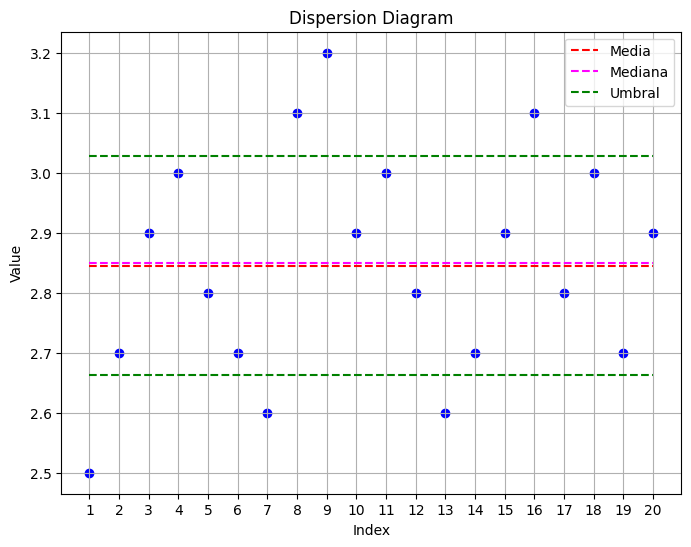

In [ ]:
import matplotlib.pyplot as plt
x_values = range(1, len(_list) + 1)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, _list, color='blue')
plt.plot(x_values, [diccionario_solucion['media']] * len(_list), linestyle='--', color='red', label='Media')
plt.plot(x_values, [diccionario_solucion['mediana']] * len(_list), linestyle='--', color='magenta', label='Mediana')
plt.plot(x_values, [diccionario_solucion['media'] + diccionario_solucion['desviacion estandar']] * len(_list), linestyle='--', color='Green', label='Umbral')
plt.plot(x_values, [diccionario_solucion['media'] - diccionario_solucion['desviacion estandar']] * len(_list), linestyle='--', color='Green')
plt.title('Dispersion Diagram')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(x_values)
plt.legend()
plt.grid(True)
plt.show()

**Segundo punto.** Se está evaluando los pesos de vehículos que cruzan un puente con el fin de estudiar su impacto en la estructura. Para ello, se ha instalado un sistema de pesaje que registró los pesos (en toneladas) de 50 vehículos durante un día. Los valores obtenidos son los siguientes: 10.2, 15.6, 12.4, 17.8, 13.5, 18.9, 16.1, 14.2, 19.0, 11.3,
   12.7, 14.8, 16.4, 15.2, 17.3, 13.9, 14.6, 10.8, 11.6, 19.5,
   13.2, 12.0, 15.9, 18.4, 16.8, 11.9, 17.1, 18.0, 14.3, 19.8,
   12.9, 14.7, 11.2, 13.8, 15.0, 17.6, 16.0, 18.7, 10.5, 16.5,
   15.5, 11.5, 12.6, 14.9, 18.1, 19.3, 17.0, 12.3, 15.7, 13.1

* Realice la tabla de frecuencias del problema dividiendo el intervalo de estudio en los intervalos $[10,12], (12,14],(14,16], (16,18], (18,20].$ Calcular la media, varianza  y desviación estándar utilizando la tabla calculada.  

In [ ]:
import pandas as pd
import numpy as np

# Datos de las puntuaciones en el examen de matemáticas
caudales = [10.2, 15.6, 12.4, 17.8, 13.5, 18.9, 16.1, 14.2, 19.0, 11.3,
   12.7, 14.8, 16.4, 15.2, 17.3, 13.9, 14.6, 10.8, 11.6, 19.5,
   13.2, 12.0, 15.9, 18.4, 16.8, 11.9, 17.1, 18.0, 14.3, 19.8,
   12.9, 14.7, 11.2, 13.8, 15.0, 17.6, 16.0, 18.7, 10.5, 16.5,
   15.5, 11.5, 12.6, 14.9, 18.1, 19.3, 17.0, 12.3, 15.7, 13.]

# Definir los límites de los intervalos
intervalos = [10, 12, 14, 16, 18, 20]

# Crear un DataFrame vacío para la tabla de distribución de frecuencias
tabla_frecuencias = pd.DataFrame(columns=['Intervalo de Puntuación', 'Marca de Clase', 'Frecuencia Absoluta'])

# Calcular la frecuencia absoluta para cada intervalo
_list = caudales
intervalos_str = []
marca_clase = []
counter_by_interval = []
for i in range(1, len(intervalos)):
  lower_bound = intervalos[i-1]
  upper_bound = intervalos[i]
  if i == 1:
    count = sum(lower_bound <= caudal <= upper_bound for caudal in caudales)
    intervalos_str.append(f"[{lower_bound },{upper_bound}]")
    marca_clase.append((lower_bound + upper_bound)/2)
    counter_by_interval.append(count)
  else:
    count = sum(lower_bound < caudal <= upper_bound for caudal in caudales)
    intervalos_str.append(f"({lower_bound },{upper_bound}]")
    marca_clase.append((lower_bound + upper_bound)/2)
    counter_by_interval.append(count)

# Agregar los datos al DataFrame
tabla_frecuencias['Intervalo de Puntuación'] = intervalos_str
tabla_frecuencias['Marca de Clase'] = marca_clase
tabla_frecuencias['Frecuencia Absoluta'] = counter_by_interval

# Calcular la frecuencia absoluta acumulada
tabla_frecuencias['Frecuencia Absoluta Acumulada'] = tabla_frecuencias['Frecuencia Absoluta'].cumsum()

# Calcular la frecuencia relativa
total_estudiantes = len(caudales)
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia Absoluta'] / total_estudiantes * 100

# Calcular la frecuencia relativa acumulada
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()

# Mostrar la tabla de distribución de frecuencias
tabla_frecuencias

,Intervalo de Puntuación,Marca de Clase,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,"[10,12]",11.0,9,9,18.0,18.0
1,"(12,14]",13.0,10,19,20.0,38.0
2,"(14,16]",15.0,13,32,26.0,64.0
3,"(16,18]",17.0,10,42,20.0,84.0
4,"(18,20]",19.0,8,50,16.0,100.0


In [ ]:
tabla_frecuencias['Marca de Clase * Frecuencia Absoluta'] = (tabla_frecuencias['Marca de Clase'] * tabla_frecuencias['Frecuencia Absoluta'] )
tabla_frecuencias

media_agrupada = tabla_frecuencias['Marca de Clase * Frecuencia Absoluta'].sum() / tabla_frecuencias['Frecuencia Absoluta'].sum()
print(f'La media agrupada es {media_agrupada}')

tabla_frecuencias['(Marca de clase - Media Agrupada)**2'] =  (tabla_frecuencias['Marca de Clase']-media_agrupada) ** 2
tabla_frecuencias['Frecuencia Absoluta*(Marca de clase - Media Agrupada)**2'] =  tabla_frecuencias['Frecuencia Absoluta'] * (tabla_frecuencias['Marca de Clase']-media_agrupada) ** 2
varianza_agrupada = (tabla_frecuencias['(Marca de clase - Media Agrupada)**2'].sum() *tabla_frecuencias['Frecuencia Absoluta'].sum()) / (tabla_frecuencias['Frecuencia Absoluta'].sum() - 1)
print(f'La varianza es {varianza_agrupada}')
desviacion_estandar_agrupada = varianza_agrupada ** (0.5)
print(f'La desviacion estandar es {desviacion_estandar_agrupada}')

tabla_frecuencias


La media agrupada es 14.92
La varianza es 40.84897959183673
La desviacion estandar es 6.391320645362485


,Intervalo de Puntuación,Marca de Clase,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada,Marca de Clase * Frecuencia Absoluta,(Marca de clase - Media Agrupada)**2,Frecuencia Absoluta*(Marca de clase - Media Agrupada)**2
0,"[10,12]",11.0,9,9,18.0,18.0,99.0,15.3664,138.2976
1,"(12,14]",13.0,10,19,20.0,38.0,130.0,3.6864,36.8640
2,"(14,16]",15.0,13,32,26.0,64.0,195.0,0.0064,0.0832
3,"(16,18]",17.0,10,42,20.0,84.0,170.0,4.3264,43.2640
4,"(18,20]",19.0,8,50,16.0,100.0,152.0,16.6464,133.1712


* Calcular el valor mínimo los cuartiles $Q_1$, $Q_2$, $Q_3$ y el valor máximo. Utilizando las fórmulas dadas.

In [ ]:
import math

def quartiles(_list):
  _list.sort()
  _len = len(_list)
  if _len // 2 == 0:
    Q2 = (_list[_len / 2 -1] + _list[_len / 2]) / 2
    if _len // 4 == 0:
      Q1 = (_list[_len / 4 -1] + _list[_len / 4]) / 2
      Q3 = (_list[3*_len / 4 -1] + _list[3*_len / 4]) / 2
    else:
      Q1 = _list[math.ceil(_len / 4)]
      Q3 = _list[math.ceil(_len * 3 / 4)]
  else:
    Q1 = _list[math.ceil(_len / 4)]
    Q2 = _list[math.ceil(_len / 2)]
    Q3 = _list[math.ceil(_len * 3 / 4)]
  return {"minimo" : min(_list) , "cuartil 1" : Q1 , "cuartil 2" : Q2, "cuartil 3" : Q3 , "maximo" : max(_list)}

In [ ]:
print(f'Dada la lista {_list}')
print(f'La descripción de cuartiles es:')
quartiles(_list)

Dada la lista [10.2, 15.6, 12.4, 17.8, 13.5, 18.9, 16.1, 14.2, 19.0, 11.3, 12.7, 14.8, 16.4, 15.2, 17.3, 13.9, 14.6, 10.8, 11.6, 19.5, 13.2, 12.0, 15.9, 18.4, 16.8, 11.9, 17.1, 18.0, 14.3, 19.8, 12.9, 14.7, 11.2, 13.8, 15.0, 17.6, 16.0, 18.7, 10.5, 16.5, 15.5, 11.5, 12.6, 14.9, 18.1, 19.3, 17.0, 12.3, 15.7, 13.0]
La descripción de cuartiles es:


{'minimo': 10.2,
 'cuartil 1': 12.9,
 'cuartil 2': 15.0,
 'cuartil 3': 17.3,
 'maximo': 19.8}